<a href="https://colab.research.google.com/github/Shadman19/DEEP_EEG_SHADMAN_19/blob/main/W2VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, Embedding

In [2]:
corpus = ['king is a strong man',
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong',
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [3]:
def remove_stop_words(corpus):
    stop_words = ['is','a','will','be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))

    return results

In [4]:
corpus = remove_stop_words(corpus)

In [5]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [6]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [7]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [8]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence))+1]:
          if neighbor != word:
              data.append([word, neighbor])

In [9]:
import pandas as pd
for text in corpus:
    print(text)
#original
df = pd.DataFrame(data, columns = ['input', 'label'])
#koo
#df = pd.DataFrame(data)


king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [10]:
#koo
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [11]:
#koo
#x = df.drop([1],axis=1)
#x

In [12]:
#y = df.drop([0],axis=1)
#y

In [13]:
type(corpus)

list

In [14]:
#type(x)

In [15]:
#type(y)

In [16]:
#vocab_size = 100
#encoded_data = [one_hot(d,vocab_size) for d in data]
#print(encoded_data)

In [17]:
#koo
df

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [18]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [19]:
df.shape

(52, 2)

In [20]:
xtry = pd.DataFrame(df , columns = ['input'])
xtry

,input
0,king
1,king
2,strong
3,strong
4,man
5,man
6,queen
7,queen
8,wise
9,wise


In [21]:
ytry = pd.DataFrame(df , columns = ['label'])
ytry

,label
0,strong
1,man
2,king
3,man
4,king
5,strong
6,wise
7,woman
8,queen
9,woman


In [22]:
x = df['input'].tolist()
x

['king',
 'king',
 'strong',
 'strong',
 'man',
 'man',
 'queen',
 'queen',
 'wise',
 'wise',
 'woman',
 'woman',
 'boy',
 'boy',
 'young',
 'young',
 'man',
 'man',
 'girl',
 'girl',
 'young',
 'young',
 'woman',
 'woman',
 'prince',
 'prince',
 'young',
 'young',
 'king',
 'king',
 'princess',
 'princess',
 'young',
 'young',
 'queen',
 'queen',
 'man',
 'strong',
 'woman',
 'pretty',
 'prince',
 'prince',
 'boy',
 'boy',
 'king',
 'king',
 'princess',
 'princess',
 'girl',
 'girl',
 'queen',
 'queen']

In [23]:
y = df['label'].tolist()
y

['strong',
 'man',
 'king',
 'man',
 'king',
 'strong',
 'wise',
 'woman',
 'queen',
 'woman',
 'queen',
 'wise',
 'young',
 'man',
 'boy',
 'man',
 'boy',
 'young',
 'young',
 'woman',
 'girl',
 'woman',
 'girl',
 'young',
 'young',
 'king',
 'prince',
 'king',
 'prince',
 'young',
 'young',
 'queen',
 'princess',
 'queen',
 'princess',
 'young',
 'strong',
 'man',
 'pretty',
 'woman',
 'boy',
 'king',
 'prince',
 'king',
 'prince',
 'boy',
 'girl',
 'queen',
 'princess',
 'queen',
 'princess',
 'girl']

In [24]:
type(x)

list

In [25]:
type(y)

list

In [26]:
len(words)

12

In [27]:
vocab_size = len(words)
encoded_x = [one_hot(d,vocab_size) for d in x]
print(encoded_x)

[[11], [11], [3], [3], [8], [8], [2], [2], [7], [7], [3], [3], [5], [5], [10], [10], [8], [8], [7], [7], [10], [10], [3], [3], [7], [7], [10], [10], [11], [11], [7], [7], [10], [10], [2], [2], [8], [3], [3], [9], [7], [7], [5], [5], [11], [11], [7], [7], [7], [7], [2], [2]]


In [28]:
vocab_size = len(words)
encoded_y = [one_hot(d,vocab_size) for d in y]
print(encoded_y)

[[3], [8], [11], [8], [11], [3], [7], [3], [2], [3], [2], [7], [10], [8], [5], [8], [5], [10], [10], [3], [7], [3], [7], [10], [10], [11], [7], [11], [7], [10], [10], [2], [7], [2], [7], [10], [3], [8], [9], [3], [5], [11], [7], [11], [7], [5], [7], [2], [7], [2], [7], [7]]


In [29]:
np.shape(encoded_x)

(52, 1)

In [30]:
np.shape(encoded_y)

(52, 1)

In [31]:
r_encoded_x = np.reshape(encoded_x,(1,52))
r_encoded_x.shape

(1, 52)

In [32]:
r_encoded_y = np.reshape(encoded_y,(1,52))
r_encoded_y.shape

(1, 52)

In [33]:
lw=len(words)
lw

12

In [34]:
embedded_vector_size = 5
max_length = 1
model = Sequential()
model.add(Embedding(vocab_size, embedded_vector_size, input_length=max_length,name="Embedding"))
model.add(Flatten())
model.add(Dense(vocab_size, activation='softmax'))

In [35]:
X = encoded_x
Y = encoded_y

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 1, 5)              60        
_________________________________________________________________
flatten (Flatten)            (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 12)                72        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(Y,X,epochs=50, verbose=0)

In [38]:
loss, accuracy = model.evaluate(X, Y)

2/2 [==============================] - 0s 6ms/step - loss: 2.3450 - accuracy: 0.3077


In [39]:
weights = model.get_layer('Embedding').get_weights()[0]
len(weights)

12

In [40]:
weights

array([[ 0.02573247, -0.0008163 ,  0.00057399, -0.01327477,  0.03331092],
       [-0.03787242,  0.03024719, -0.04563653,  0.01469585, -0.02015836],
       [ 0.06831645,  0.10794768, -0.04345185,  0.01720954, -0.06118944],
       [ 0.09820179,  0.09333408, -0.09597109,  0.03651422,  0.01301358],
       [-0.02017862, -0.03070487,  0.00286074, -0.0416612 ,  0.03011565],
       [ 0.02936158,  0.09790126, -0.07959351, -0.04768711,  0.0200714 ],
       [-0.00413907,  0.00212695,  0.01292915,  0.04697743,  0.0139069 ],
       [ 0.13349038, -0.05877284,  0.11326931, -0.0902103 ,  0.04344185],
       [ 0.08105102, -0.10223393,  0.06971233, -0.12684464,  0.07480845],
       [ 0.09192077, -0.07544856,  0.1180783 , -0.0778348 ,  0.02896291],
       [ 0.04923254,  0.09601523, -0.08696069, -0.12529774, -0.03584122],
       [ 0.11991989,  0.10095876, -0.06451272, -0.01541064, -0.03981029]],
      dtype=float32)

In [41]:
weights[3]

array([ 0.09820179,  0.09333408, -0.09597109,  0.03651422,  0.01301358],
      dtype=float32)

In [42]:
w2v_df = pd.DataFrame(weights, columns = ['x1', 'x2','x3', 'x4','x5'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2','x3', 'x4','x5']]
w2v_df

,word,x1,x2,x3,x4,x5
0,girl,0.025732,-0.000816,0.000574,-0.013275,0.033311
1,princess,-0.037872,0.030247,-0.045637,0.014696,-0.020158
2,boy,0.068316,0.107948,-0.043452,0.017210,-0.061189
3,queen,0.098202,0.093334,-0.095971,0.036514,0.013014
4,man,-0.020179,-0.030705,0.002861,-0.041661,0.030116
5,king,0.029362,0.097901,-0.079594,-0.047687,0.020071
6,young,-0.004139,0.002127,0.012929,0.046977,0.013907
7,pretty,0.133490,-0.058773,0.113269,-0.090210,0.043442
8,wise,0.081051,-0.102234,0.069712,-0.126845,0.074808
9,strong,0.091921,-0.075449,0.118078,-0.077835,0.028963


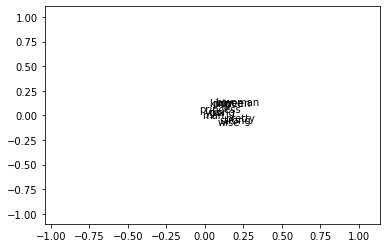

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2, x3, x4, x5 in zip(w2v_df['word'], w2v_df['x1'], w2v_df ['x2'], w2v_df['x3'], w2v_df ['x4'], w2v_df['x5']):
    ax.annotate(word, (x1,x2 ))

PADDING = 1.0
x_axis_min = np.amin(weights, axis=0)[0]-PADDING
y_axis_min = np.amin(weights, axis=0)[1]-PADDING
x_axis_max = np.amax(weights, axis=0)[0]+PADDING
y_axis_max = np.amax(weights, axis=0)[1]+PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [ ]:
#Reference
#https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb